# Biodiversity Project

This project is part of the Codecademy course "Data Scientist: Natural Language Processing Career Path".

For this project, data from National Parks Service about endangered species in different parks will be interpreted in order to check any patterns to endangered species.

### Goals

The aim of the project is to investigate any patterns or themes to the types of species that become endangered and then assess the likeliness of becoming extinct.

### Resources

Data from National Parks Service:

- observations.csv

- species_info.csv

For classification status:

- nps.gov

- fisheries.noaa.gov

- wikipedia.org

- maine.gov

Other:

- wikipedia.org

### Analysis


Some analysis of the data will intend to answer the following questions:

- What is the distribution of `conservation_status` for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?



## 1. Importing Python Libraries

This project will be using Seaborn and Matplotlib libraries to plot data. Also, this project will be using Pandas and Numpy for data manipulation.


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the data


In [63]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

## 3. Distribution of the conservation status 

Conservation status values are in the `species` dataset.

### 3.1 Inspecting the `species` dataset

In the `species` dataset there are four columns: `category`,`scientific_name`,`common_names`, and `conservation_status`.

The first five entries of the `conservation_status` columns have no data.

In [64]:
print(species.columns)
print(species.head(10))


Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                  

As seen below, most entries in the conservation status columns (about 97%) have missing data.

In [65]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [66]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


### 3.1.1 Handling missing data

Since there are 191 non-null values in the `conservation_status` column, it is crucial to tackle missing data. Despite the fact that there are 5824 rows, most of them have missing data for the conservation_status column.

In [67]:
species.conservation_status.isna().value_counts()

True     5633
False     191
Name: conservation_status, dtype: int64

In [68]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [69]:
# getting to know species that have a value for the conservation_status column
species_conservation = species[species.conservation_status.notna()]
species_conservation = species_conservation.rename(columns={'scientific_name': 'scientific', 'common_names': 'nicknames',\
                                     'conservation_status': 'status'})
print(species_conservation.scientific.nunique())
species_conservation.scientific.unique()


179


array(['Canis latrans', 'Canis lupus', 'Canis rufus', 'Eptesicus fuscus',
       'Lasionycteris noctivagans', 'Myotis austroriparius',
       'Myotis grisescens', 'Myotis keenii', 'Myotis leibii',
       'Myotis lucifugus', 'Myotis septentrionalis', 'Myotis sodalis',
       'Glaucomys sabrinus coloratus', 'Accipiter cooperii',
       'Accipiter striatus', 'Aquila chrysaetos', 'Buteo lineatus',
       'Circus cyaneus', 'Elanoides forficatus',
       'Haliaeetus leucocephalus', 'Cathartes aura', 'Pandion haliaetus',
       'Aythya affinis', 'Chlidonias niger', 'Larus atricilla',
       'Coccyzus erythropthalmus', 'Falco columbarius',
       'Falco peregrinus', 'Gavia immer', 'Grus americana',
       'Rallus elegans', 'Guiraca caerulea', 'Piranga rubra',
       'Certhia americana', 'Aimophila aestivalis',
       'Ammodramus savannarum', 'Melospiza lincolnii',
       'Loxia curvirostra', 'Progne subis', 'Riparia riparia',
       'Tachycineta bicolor', 'Lanius ludovicianus', 'Icteria virens

In [70]:
# getting to know species that have no value for the conservation_status column
species_nan = species[species.conservation_status.isna()]
species_nan = species_nan.rename(columns={'scientific_name': 'scientific', 'common_names': 'nicknames',\
                                     'conservation_status': 'status'})
species_nan.head()
species_nan.duplicated().value_counts()

False    5633
dtype: int64

#### Some analysis

Provided that the number of missing data is too high, listwise deletion is not an option in that it would reduce the sample size too much. Although, that will be required to assess the distribution of conservation status for animals.

On the other hand, in spite of the `conservation_status` value is missing, information in other columns (category, scientific name, and common names) might be important to analyse the `observation` dataset.

### 3.1.2 Handling duplicated data

Since each species has its own unique scientific name, the expected unique number should be the same of the number of rows (5824). However, there are 5541 unique values in the `scientific name`  column, which reveals the existence of duplicated entries. 



### 3.1.2.1 Inspecting `scientific_name` duplicated data

In [222]:
species1 = species.rename(columns={'scientific_name': 'scientific',  
                        'common_names': 'nicknames', 'conservation_status':'status'})

# checking duplicated rows
print("Is there duplicated rows?", species1.duplicated().unique()[0])

#checking duplicated values in the scientific column

species_dup_scientific = species1[species1.duplicated(subset=['scientific'], keep=False)].\
                     sort_values(by='scientific')

species_dup_scientific.describe(include='all')

Is there duplicated rows? False


,category,scientific,nicknames,status
count,557,557,557,23
unique,6,274,554,4
top,Vascular Plant,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern
freq,414,3,2,19


In [131]:
# duplicated values in the scientific_name column
species_dup_scientific[species_dup_scientific.duplicated(subset=['scientific'], keep=False)].\
   sort_values(by='scientific')

,category,scientific,nicknames,status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


In [132]:
# duplicated values in the scientific_name AND common_names columns
species_dup_scientific[species_dup_scientific.duplicated(subset=['scientific', 'nicknames'], keep=False)]

,category,scientific,nicknames,status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN


In [133]:
species_dup_scientific[species_dup_scientific.duplicated(subset=['nicknames'], keep=False)]

,category,scientific,nicknames,status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
1096,Vascular Plant,Silene latifolia ssp. alba,Bladder Campion,NaN
1102,Vascular Plant,Silene vulgaris,Bladder Campion,NaN


In [229]:
species_dup_scientific[(species_dup_scientific.scientific == 'Silene vulgaris') |  \
                       (species_dup_scientific.nicknames == 'Bladder Campion') | \
                      (species_dup_scientific.scientific == 'Silene latifolia ssp. alba')]

,category,scientific,nicknames,status
4988,Vascular Plant,Silene latifolia ssp. alba,"Bladder Campion, Bladder-Campion, Evening Lych...",NaN
1096,Vascular Plant,Silene latifolia ssp. alba,Bladder Campion,NaN
3717,Vascular Plant,Silene vulgaris,"Bladder Campion, Bladder Silene, Cowbell, Maid...",NaN
1102,Vascular Plant,Silene vulgaris,Bladder Campion,NaN


#### Some findings
Unexpectadly, among 557 rows with duplicated values in the scientific_name column, there are 274 unique values. 
It turns out that most of duplicated rows for the same `scientific_name` was due to the `common_names` values recorded. For these `scientific_nam` duplicated values, there are at least two different records for the `common_name` column. For example, there are two entries for the `scientific_name` value 'Agrostis capillaris':
- the first entry has 'Colonial Bent, Colonial Bentgrass' for the `common_name` column;
- the second entry has 'Rhode Island Bent' for the `common_name` column.

On the other hand, where there are duplicated values in the `scientific_name` column AND `common_names` column, there are different entries in the `conservation_status` column. In the 'Canis lupus' value case, there are two different values for `conservation_status` value ('In recovery' and 'Endangered').

There is a single case of `common_names` value 'Bladder Campion' which has two different entries in the `scientific_name` value: 'Silene latifolia ssp. alba' and 'Silene vulgaris'. Each one has two different entries in the `common_names` column.

### 3.1.2.2 Inspecting `common_names` duplicated data

Common names refer to the usual name of species. Conversely to scientific name, a common name often applies to multiple species.

In [137]:
#checking duplicated values in the common_names column

species_dup_nicknames = species1[species1.duplicated(subset=['nicknames'], keep=False)].\
                     sort_values(by='nicknames')

species_dup_nicknames.describe(include='all')


,category,scientific,nicknames,status
count,568,568,568,12
unique,5,566,248,4
top,Vascular Plant,Oncorhynchus mykiss,Brachythecium Moss,Species of Concern
freq,330,2,7,9


In [140]:
# Getting to know duplicate data in the scientific_name column AND nicknames column

species_dup_nicknames[species_dup_nicknames.duplicated(subset=['scientific'], keep=False)]

,category,scientific,nicknames,status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN


In [167]:
# Getting to know duplicated data in the common_names column
species_dup_nicknames

,category,scientific,nicknames,status
2730,Nonvascular Plant,Dichodontium pellucidum,A Moss,NaN
2822,Nonvascular Plant,Cirriphyllum piliferum,A Moss,NaN
2022,Vascular Plant,Carex normalis,"A Sedge, Sedge",NaN
1971,Vascular Plant,Carex bromoides,"A Sedge, Sedge",NaN
1960,Vascular Plant,Carex annectens,"A Sedge, Sedge",NaN
...,...,...,...,...
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,NaN
252,Bird,Dendroica dominica,Yellow-Throated Warbler,NaN
3206,Bird,Setophaga dominica,Yellow-Throated Warbler,NaN
2957,Nonvascular Plant,Zygodon viridissimus var. rupestris,Zygodon Moss,NaN


In [218]:
species_dup_nicknames[species_dup_nicknames['nicknames'] == 'Brachythecium Moss']

,category,scientific,nicknames,status
2817,Nonvascular Plant,Brachythecium rutabulum,Brachythecium Moss,NaN
2814,Nonvascular Plant,Brachythecium oxycladon,Brachythecium Moss,NaN
2813,Nonvascular Plant,Brachythecium oedipodium,Brachythecium Moss,NaN
2812,Nonvascular Plant,Brachythecium digastrum,Brachythecium Moss,NaN
2816,Nonvascular Plant,Brachythecium rivulare,Brachythecium Moss,NaN
2818,Nonvascular Plant,Brachythecium salebrosum,Brachythecium Moss,NaN
2815,Nonvascular Plant,Brachythecium plumosum,Brachythecium Moss,NaN


In [217]:
# Getting to know duplicated data over than two entries in the common_names column
spe_dup_nick_over2 = species_dup_nicknames[species_dup_nicknames.duplicated(subset=['nicknames'], keep = False)]
spe_dup_nick_over2 = spe_dup_nick_over2.groupby('nicknames').count().reset_index().sort_values(by='category')
spe_dup_nick_over2.rename(columns={'category': 'counts'}, inplace=True)
spe_dup_nick_over2 = spe_dup_nick_over2[spe_dup_nick_over2.counts > 2].sort_values(by='counts', ascending=False)
spe_dup_nick_over2.describe(include='all')


,nicknames,counts,scientific,status
count,41,41.000000,41.000000,41.000000
unique,41,NaN,NaN,NaN
top,Dicranum Moss,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,3.756098,3.756098,0.024390
std,NaN,1.157162,1.157162,0.156174
min,NaN,3.000000,3.000000,0.000000
25%,NaN,3.000000,3.000000,0.000000
50%,NaN,3.000000,3.000000,0.000000
75%,NaN,4.000000,4.000000,0.000000


##### Some findings

There are 568 duplicated values in the `common_names` column, most of them due to the common name designates two different species. 

Among these, there are 41 `common_names` values given to more than two differente species, v.g, *'Brachythecium Moss'* common name was given to seven different species: 'Brachythecium rutabulum', 'Brachythecium oxycladon', 'Brachythecium oedipodium', 'Brachythecium digastrum', 'Brachythecium rivulare', 'Brachythecium salebrosum', and 'Brachythecium plumosum'.

There are two cases of duplicated data in the `scientific_name`column AND `common_names` column, which for were given different `conservation_status` values.

### 3.1.2.3 Removing duplicated data

Detected duplicated data in the `scientific_name` column of `species` dataset, they must be removed in order to assess the conservation status distribution correctly.

In [ ]:
def remove_duplicated(df, df.a, df.b):
    

## 3.2 Inspecting the `observations` dataset

In the `observations` dataset there are three columns: `scientific_name`, `park_name`, and `observations`.


In [76]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [77]:
observations1 = observations.rename(columns={'scientific_name': 'scientific', 'park_name': 'park'})
print(observations1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   scientific    23296 non-null  object
 1   park          23296 non-null  object
 2   observations  23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [78]:
print(observations1.describe(include='all'))

              scientific                                 park  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000


In [79]:
print(observations1.scientific.duplicated().value_counts())

True     17755
False     5541
Name: scientific, dtype: int64


In [80]:
print(observations1.scientific.value_counts())

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific, Length: 5541, dtype: int64


In [81]:
print(observations1.park.value_counts())

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park, dtype: int64


#### Some findings

There are 5541 different species spotted and 5824 entries for each park (Great Smoky Mountains National Park,
Yosemite National Park, Bryce National Park, and Yellowstone National Park).

### 3.2.1 Checking for duplicated scientific name values per park

First, data will be split per park.

In [82]:
smoky = observations1[observations1['park'] == 'Great Smoky Mountains National Park']
smoky.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
8840,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147
11487,Lespedeza violacea,Great Smoky Mountains National Park,146
20231,Botrychium dissectum,Great Smoky Mountains National Park,144
11847,Festuca subulata,Great Smoky Mountains National Park,141
17366,Branta hutchinsii,Great Smoky Mountains National Park,139


In [83]:
print(smoky.scientific.duplicated().value_counts())
smoky_duplicated = smoky[smoky.duplicated(subset=['scientific'])]
smoky_duplicated[smoky_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
17756,Canis lupus,Great Smoky Mountains National Park,14
20353,Canis lupus,Great Smoky Mountains National Park,30
3792,Castor canadensis,Great Smoky Mountains National Park,62
19563,Castor canadensis,Great Smoky Mountains National Park,86
13448,Columba livia,Great Smoky Mountains National Park,91
12700,Columba livia,Great Smoky Mountains National Park,34
19577,Holcus lanatus,Great Smoky Mountains National Park,74
19218,Holcus lanatus,Great Smoky Mountains National Park,77
1519,Hypochaeris radicata,Great Smoky Mountains National Park,73
22139,Hypochaeris radicata,Great Smoky Mountains National Park,65


In [84]:
yosemite = observations1[observations1['park'] == 'Yosemite National Park']
yosemite.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
6682,Ivesia shockleyi var. shockleyi,Yosemite National Park,223
12527,Lipocarpha micrantha,Yosemite National Park,222
22161,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219
1607,Trillium rugelii,Yosemite National Park,219
16763,Castilleja pallescens,Yosemite National Park,214


In [85]:
print(yosemite.scientific.duplicated().value_counts())
yosemite_duplicated = yosemite[yosemite.duplicated(subset=['scientific'])]
yosemite_duplicated[yosemite_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
19987,Canis lupus,Yosemite National Park,44
19330,Canis lupus,Yosemite National Park,117
14391,Castor canadensis,Yosemite National Park,191
19997,Castor canadensis,Yosemite National Park,161
10468,Columba livia,Yosemite National Park,144
17928,Columba livia,Yosemite National Park,137
6277,Holcus lanatus,Yosemite National Park,179
8335,Holcus lanatus,Yosemite National Park,138
1539,Hypochaeris radicata,Yosemite National Park,172
9681,Hypochaeris radicata,Yosemite National Park,176


In [86]:
bryce = observations1[observations1['park'] == 'Bryce National Park']
bryce.sort_values(by='observations', ascending=False).head()


,scientific,park,observations
13138,Valerianella radiata,Bryce National Park,176
19536,Melilotus indica,Bryce National Park,173
18228,Ericameria bloomeri,Bryce National Park,172
11089,Martes americana,Bryce National Park,167
4075,Draba oligosperma,Bryce National Park,167


In [87]:
print(bryce.scientific.duplicated().value_counts())
bryce_duplicated = bryce[bryce.duplicated(subset=['scientific'])]
bryce_duplicated[bryce_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
9884,Canis lupus,Bryce National Park,74
7346,Canis lupus,Bryce National Park,29
16654,Castor canadensis,Bryce National Park,103
13825,Castor canadensis,Bryce National Park,105
3441,Columba livia,Bryce National Park,96
6968,Columba livia,Bryce National Park,108
8405,Holcus lanatus,Bryce National Park,117
8561,Holcus lanatus,Bryce National Park,96
16381,Hypochaeris radicata,Bryce National Park,86
17537,Hypochaeris radicata,Bryce National Park,103


In [88]:
yellowstone = observations1[observations1['park'] == 'Yellowstone National Park']
yellowstone.sort_values(by='observations', ascending=False).head()

,scientific,park,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321
1168,Castilleja miniata,Yellowstone National Park,317
20734,Cryptantha fendleri,Yellowstone National Park,316
8749,Dracocephalum parviflorum,Yellowstone National Park,316
7112,Bidens tripartita,Yellowstone National Park,314


In [89]:
print(yellowstone.scientific.duplicated().value_counts())
yellowstone_duplicated = yellowstone[yellowstone.duplicated(subset=['scientific'])]
yellowstone_duplicated[yellowstone_duplicated.duplicated(subset=['scientific'], keep=False)].sort_values(by='scientific')

False    5541
True      283
Name: scientific, dtype: int64


,scientific,park,observations
13427,Canis lupus,Yellowstone National Park,203
10907,Canis lupus,Yellowstone National Park,67
9811,Castor canadensis,Yellowstone National Park,256
13025,Castor canadensis,Yellowstone National Park,264
11193,Columba livia,Yellowstone National Park,239
10688,Columba livia,Yellowstone National Park,232
15829,Holcus lanatus,Yellowstone National Park,256
20640,Holcus lanatus,Yellowstone National Park,287
13317,Hypochaeris radicata,Yellowstone National Park,262
22333,Hypochaeris radicata,Yellowstone National Park,220


In [90]:
# Duplicated species observations per park
smoky_dup_list = smoky_duplicated[smoky_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
smoky_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [91]:
yosemite_dup_list = yosemite_duplicated[yosemite_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
yosemite_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [92]:
bryce_dup_list = bryce_duplicated[bryce_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
bryce_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [93]:
yellowstone_dup_list = yellowstone_duplicated[yellowstone_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
yellowstone_dup_list.scientific.unique()

array(['Canis lupus', 'Castor canadensis', 'Columba livia',
       'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus',
       'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'],
      dtype=object)

In [94]:
species_dup_list = species_duplicated[species_duplicated.duplicated(subset=['scientific'], keep=False)]\
.sort_values(by='scientific', ascending=True)
species_dup_list.scientific.unique()

array(['Agrostis capillaris', 'Agrostis gigantea', 'Agrostis mertensii',
       'Agrostis scabra', 'Agrostis stolonifera', 'Agrostis variabilis',
       'Alectoris chukar', 'Amaranthus albus', 'Amaranthus retroflexus',
       'Ambrosia artemisiifolia', 'Anagallis arvensis', 'Anthemis cotula',
       'Anthus rubescens', 'Apocynum androsaemifolium',
       'Apocynum cannabinum', 'Arabidopsis thaliana', 'Arctium minus',
       'Arenaria serpyllifolia', 'Asparagus officinalis', 'Avena sativa',
       'Barbarea vulgaris', 'Bidens cernua', 'Bidens tripartita',
       'Botrychium simplex', 'Botrychium virginianum', 'Branta bernicla',
       'Brassica rapa', 'Bromus japonicus', 'Bromus secalinus',
       'Bromus tectorum', 'Bulbostylis capillaris', 'Butorides virescens',
       'Calamagrostis canadensis', 'Callitriche heterophylla',
       'Canis lupus', 'Cannabis sativa', 'Capsella bursa-pastoris',
       'Cardamine pensylvanica', 'Carduus acanthoides', 'Carex leptalea',
       'Carum carvi',

#### Some findings
There are duplicated records for the species *'Canis lupus', 'Castor canadensis', 'Columba livia', 'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus','Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'* for all the four parks. 

Since the same species have duplicated values, it's unlikely that happened due to random circunstances.

Those species are the same that have duplicated values in the *species* dataset. As seen above, duplicated values in the `scientific_name` column is due to different entries of `common_names` for the same species.

### 4. Distribution of conservation status for animals

Under the Endangered Species Act (ESA) at-risk species are classified as endangered species and threatened species.

An **endangered species** is any species in danger of extinction.

A **threatened species** is any species which is likely to become endangered within the foreseeable future. 

Species designated as threatened or endangered are called **listed species** in that they are added to the federal lists of endangered and threatened wildlife and plants. Species must meet the definition of endangered and threatened under the Act.

The National Park Service dataset lists at-risk species in parks and includes those under the Endangered Species Act, and also state, local, and tribal listed species.

A **species of special concern** is any species that is particularly vulnerable, and could easily become endangered.

An **in recovery species** is any species that is subjected to a recovery program in order to no longer require special protection.

##### Some findings

There are 1021 records for the category animal ('Mammal', 'Bird', 'Reptile', 'Amphibian', and 'Fish') in the dataset.

As seen below, `Bird` is the largest group, with 521 records.

In [95]:
species_animals = species[species.category.str.contains('Plant') == False]
print('Number of entries:', species_animals.category.count())
species_animals.category.unique()

Number of entries: 1021


array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish'], dtype=object)

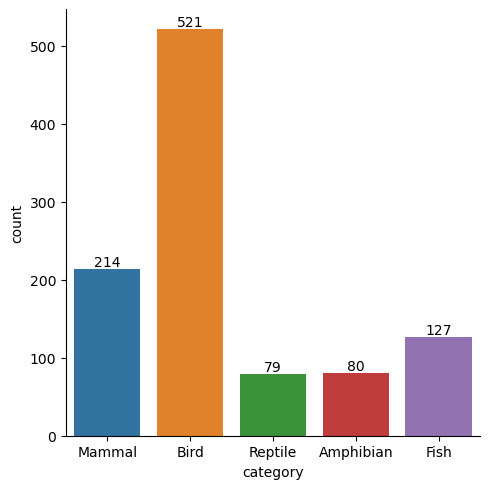

In [96]:
ax = sns.catplot(data=species_animals, x='category', kind='count')
ax = ax.facet_axis(0,0)
for i in ax.containers:
    ax.bar_label(i,)

#### 4.1 Dealing with duplicated data

Most of duplicated rows for the same species was due to the common names recorded for the same `scientific_name` value recorded. The duplicated species are 'Canis lupus', 'Castor canadensis', 'Columba livia','Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus','Procyon lotor', 'Puma concolor', 'Streptopelia decaocto'.
However, in the 'Canis lupus' case, there are two different for entries in the `conservation_status` column ('In recovery' and 'Endangered').


In [97]:
species_duplicated[species_duplicated.duplicated(subset=['scientific'], keep=False)].\
sort_values(by='scientific')


,category,scientific,nicknames,status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


In [98]:
print(species[species['scientific_name'] == 'Canis lupus'])

# species2 = species
# species2.rename(columns={'scientific_name': 'scientific', 'common_names': 'nicknames'}, inplace=True)
# print(species2[species2.scientific == 'Canis lupus'])
# species2['More than one common name'] = species2.apply(lambda row: True if ', ' in row['nicknames']\
#                                              else False, axis=1)
# species2.sort_values(by='More than one common name', inplace=True)
# species2[species2.scientific == 'Canis lupus']


     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


#### 4.2 Handling missing data

As seen before, most entries in the conservation status columns (about 97%) have missing data. For 5633 records, there are 191 species with information about its conservation status in the dataset.

For the purpose of this topic, it's important to assess the distribution of missing data among animals category.


<Figure size 800x600 with 0 Axes>

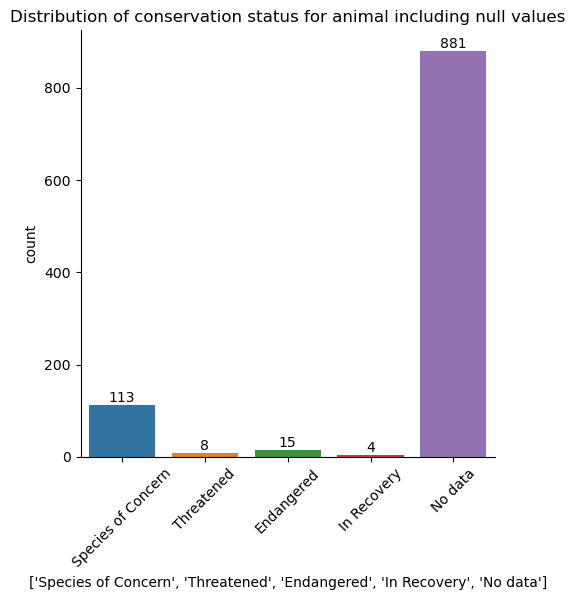

In [99]:
# Visualizing the distribution of missing conservation status data
species_animal_null = species_animals.fillna(value='No data')
species_animal_null.head(10)

order=['Species of Concern','Threatened', 'Endangered', 'In Recovery', "No data"]

plt.figure(figsize=(8,6))
ax = sns.catplot(data=species_animal_null, x='conservation_status', kind='count', \
                 order= order)
ax = ax.facet_axis(0,0)
for i in ax.containers:
    ax.bar_label(i,)
axe = plt.subplot()
axe.set_xticks(ticks=range(5))
axe.set_xlabel(order)
axe.set_xticklabels(labels = order, rotation=45)
plt.title("Distribution of conservation status for animal including null values")
plt.show()
plt.clf()


##### Some findings

Missing data outnumber other `conservation_status` values for all groups of animals as seen on the graphs below. 

Possilble causes for that are:
- most species have not been included on the list;
- those species' conservation status were not informed.

<Figure size 640x480 with 0 Axes>

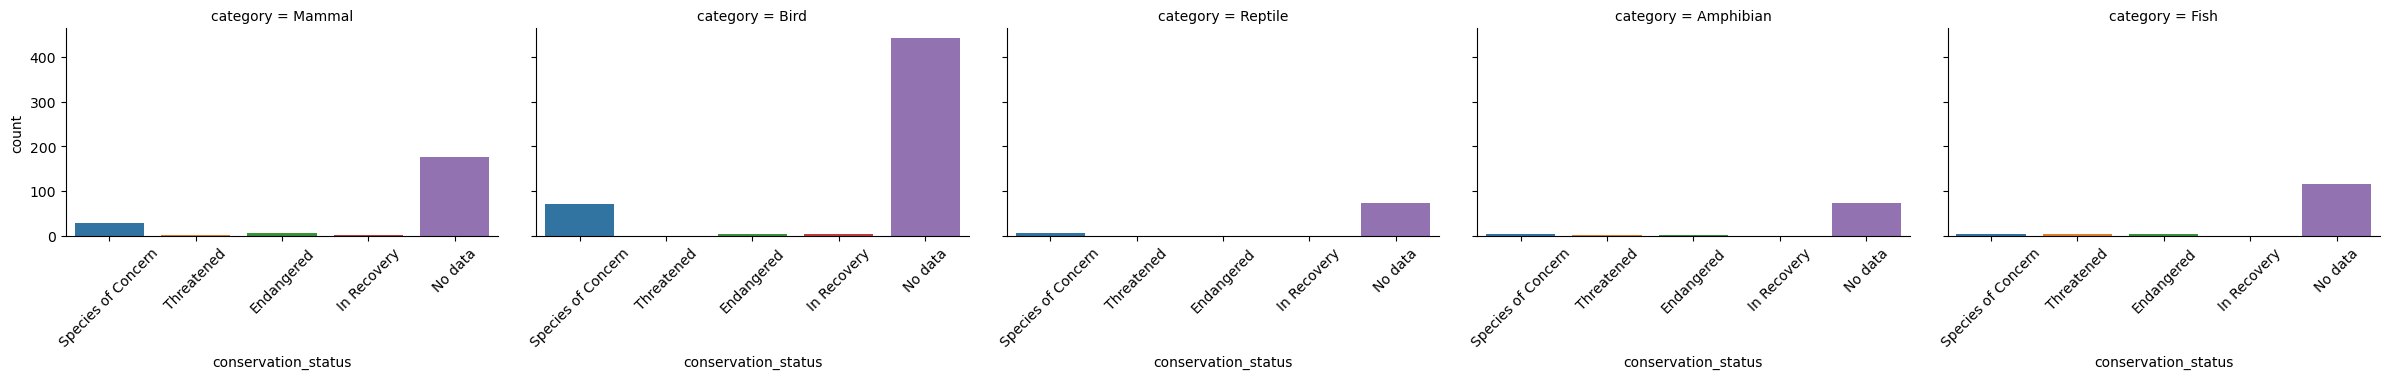

In [100]:
g = sns.catplot(data=species_animal_null, x='conservation_status', col='category', col_wrap = 5,\
            kind='count', height=3, aspect=8/5, \
            order=['Species of Concern','Threatened', 'Endangered', 'In Recovery', "No data"])

g.fig.tight_layout()
g.set_xticklabels(labels=order, rotation=45)

plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

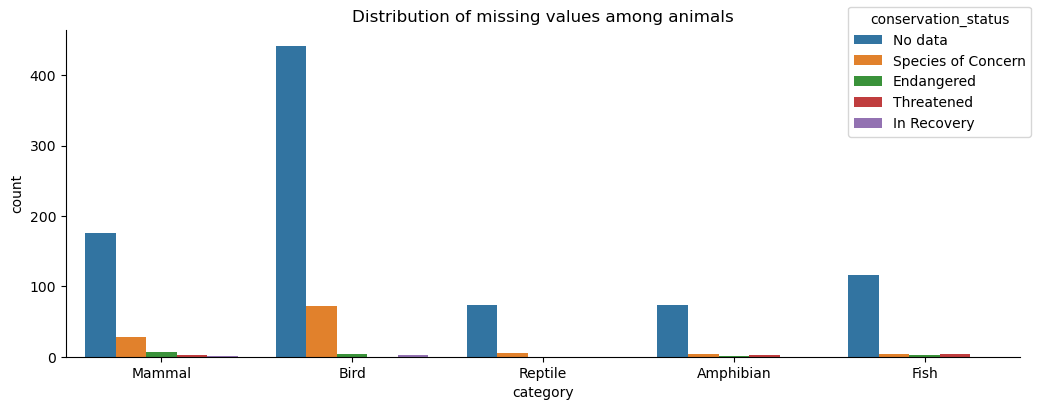

In [101]:
g = sns.catplot(data=species_animal_null, x='category', hue='conservation_status',\
            kind='count', height=4, aspect=13/5, legend_out=False)

sns.move_legend(g, "upper right")
plt.title("Distribution of missing values among animals")
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

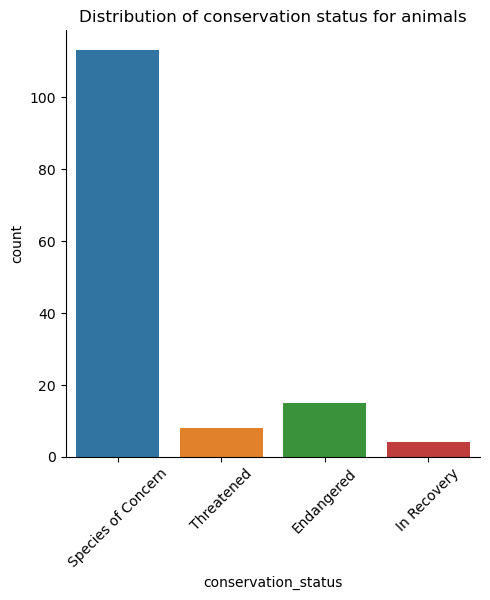

In [102]:
# Visualizing the distribution of conservation status

plt.figure(figsize=(10,7))
ax = sns.catplot(data=species_animals, x='conservation_status', kind='count', \
                 order=['Species of Concern','Threatened', 'Endangered', 'In Recovery'])
ax.set_xticklabels(rotation=45)
plt.title("Distribution of conservation status for animals")
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

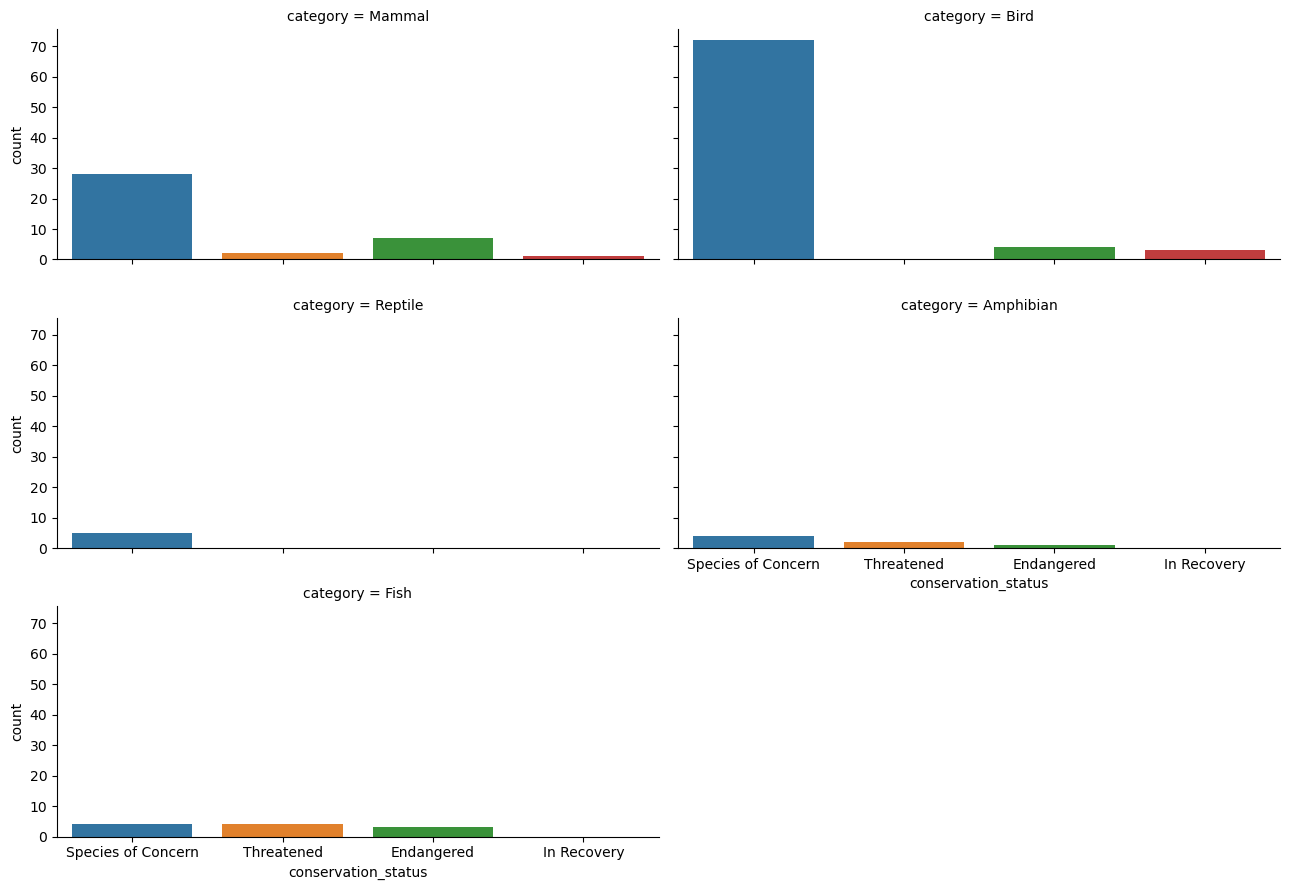

In [103]:
animals = sns.catplot(data=species_animals, x='conservation_status', col='category', col_wrap = 2,\
                      kind='count', order=['Species of Concern','Threatened', 'Endangered', 'In Recovery'],\
                      height=3, aspect=13/6)
plt.show()
plt.clf()


#### Some findings

Most animals were listed as *species of concern* conservation status.



## Which species were spotted the most at each park?

## Selecting species with conservation status data

In [104]:
# merging

conservation = species.merge(observations, on='scientific_name')
conservation.head()
conservation.info()
print(conservation.duplicated(subset=['scientific_name']).value_counts())
conservation['conservation_status'].isna().value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
True     20091
False     5541
dtype: int64


True     24752
False      880
Name: conservation_status, dtype: int64

In [105]:
conservation1 = conservation[conservation['conservation_status'].notnull()]

In [106]:
conservation1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 64 to 25047
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             880 non-null    object
 1   scientific_name      880 non-null    object
 2   common_names         880 non-null    object
 3   conservation_status  880 non-null    object
 4   park_name            880 non-null    object
 5   observations         880 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 48.1+ KB


In [107]:
conservation1.duplicated(subset=['scientific_name']).value_counts()

True     701
False    179
dtype: int64

In [108]:
conservation1.head(10)

,category,scientific_name,common_names,conservation_status,park_name,observations
64,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
65,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
66,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
67,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
68,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
69,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
70,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
71,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
72,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
73,Mammal,Canis lupus,Gray Wolf,Endangered,Yellowstone National Park,60


In [109]:
conservation1.groupby('scientific_name').sum('observations')

,observations
scientific_name,
Abies fraseri,518
Abronia ammophila,523
Accipiter cooperii,543
Accipiter striatus,446
Achnatherum contractum,549
...,...
Vaccinium hirsutum,486
Vermivora bachmanii,141
Vermivora ruficapilla,463


- What is the distribution of `conservation_status` for animals?

- Are the differences between species and their conservation status significant?

- Are certain types of species more likely to be endangered?